<a href="https://colab.research.google.com/github/AshvinVignesh/Spam-Mail-Detection/blob/main/SPAM_MAIL_CW(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
#load the dataset
headers = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_%3B','char_freq_%28','char_freq_%5B','char_freq_%21','char_freq_%24','char_freq_%23','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']
df = pd.read_csv('spambase.data', header=None, names=headers)

In [3]:
df.head(25)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,1


In [4]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [5]:
print(len(df.columns))

58


In [6]:
print(df['class'].value_counts())

0    2788
1    1813
Name: class, dtype: int64


In [7]:
from sklearn.metrics import classification_report,confusion_matrix

In [8]:
x = df.drop(columns=['class'])
Y= df['class'].values

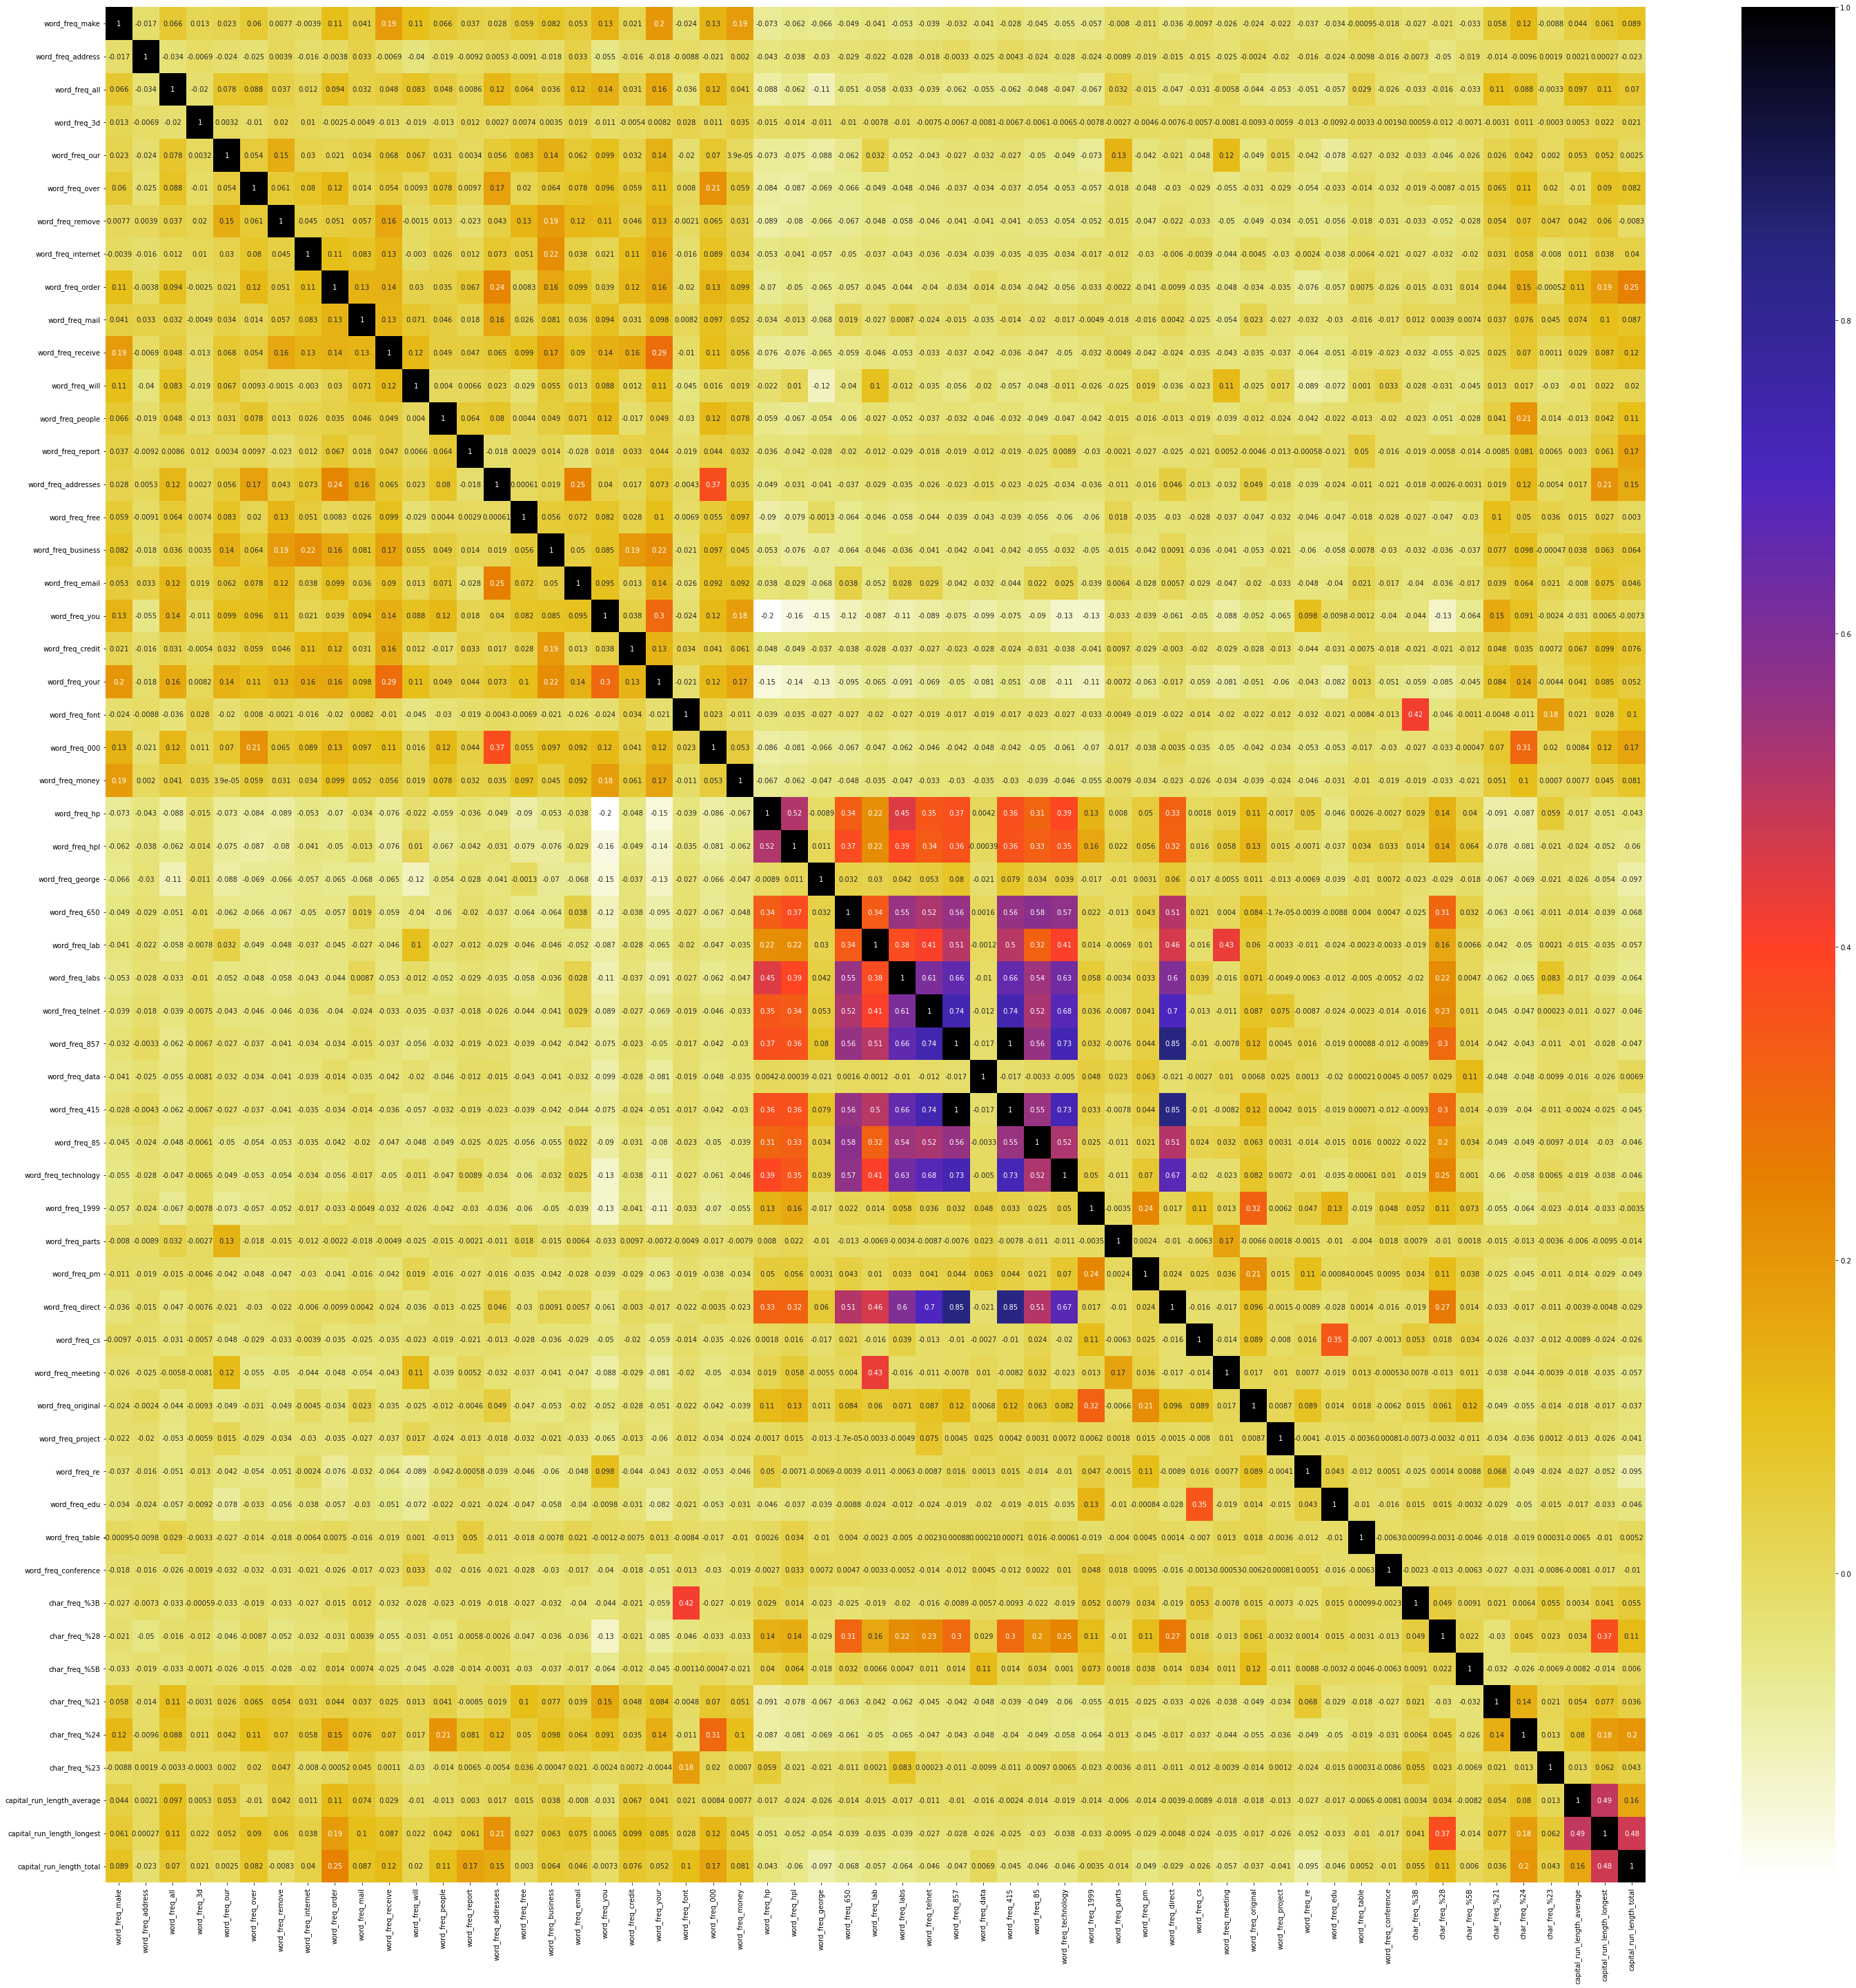

In [9]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(50,50))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

**PCA**

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
#Standadiziing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [12]:
x = pd.DataFrame(data=scaled_data , columns = x.columns)

In [13]:
print(len(x.columns))

57


In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=4)
principle_comoponents = pca.fit_transform(x)

In [16]:
x = pd.DataFrame(data = principle_comoponents, columns=['PC1', 'PC2','PC3','PC4'])
x.head()

,PC1,PC2,PC3,PC4
0,-0.731750,-0.042762,-0.568236,0.209775
1,-1.185086,2.067683,0.036056,-0.489314
2,-1.467596,5.023814,3.266456,-1.001435
3,-0.805348,0.427394,-0.585962,0.067679
4,-0.806280,0.426637,-0.588062,0.067561


Text(0.5, 1.0, 'scree plot')

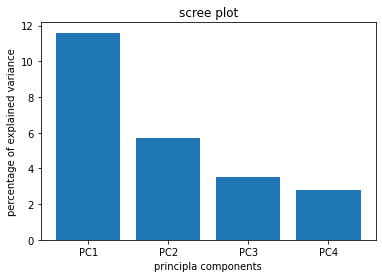

In [17]:
per_var =np.round(pca.explained_variance_ratio_ * 100 , decimals=1)
label = ['PC' + str(x) for x in range(1,len(per_var) + 1 )]
plt.bar(x=range(1,len(per_var)+1),height = per_var , tick_label = label)
plt.ylabel("percentage of explained variance")
plt.xlabel('principla components')
plt.title('scree plot')

In [18]:
print(scaled_data.shape)
print(x.shape)

(4601, 57)
(4601, 4)


In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.25,random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [22]:
print(grid_search.best_params_)

{'n_neighbors': 11}


In [23]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Accuracy for our training dataset with tuning is : 89.45%


In [24]:
knn= KNeighborsClassifier(n_neighbors = 11)

In [25]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=11)

In [26]:
predictions=knn.predict(X_test)

In [27]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       676
           1       0.90      0.87      0.89       475

    accuracy                           0.91      1151
   macro avg       0.91      0.90      0.91      1151
weighted avg       0.91      0.91      0.91      1151



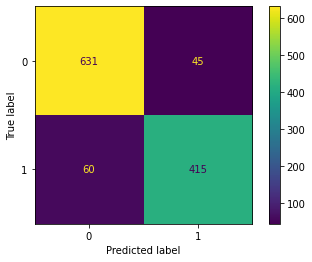

In [28]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [29]:
print(confusion_matrix(Y_test,predictions) )

[[631  45]
 [ 60 415]]


In [30]:
y_pred=knn.predict(X_test)

In [31]:
ac = accuracy_score(Y_test,y_pred)
print(ac*100)

90.87749782797567


BOOST

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
model = AdaBoostClassifier( random_state=42)
model.fit(X_train,Y_train)
y_pred_adaboost=model.predict(X_test)
print(f'Test score {accuracy_score(y_pred_adaboost,Y_test)*100}')

Test score 89.1398783666377


GBC

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
model1= GradientBoostingClassifier(learning_rate=0.05,random_state=42)
model1.fit(X_train, Y_train)
y_pred_GBM=model1.predict(X_test)
print(f'Test score {accuracy_score(y_pred_GBM,Y_test)*100}')

Test score 89.92180712423979


In [43]:
import xgboost as xgb

In [53]:
model2=xgb.XGBClassifier(random_state=0,learning_rate=0.05)
model2.fit(X_train, Y_train)
y_pred_xgboost=model2.predict(X_test)
print(f'Test score {accuracy_score(y_pred_xgboost,Y_test)*100}')

Test score 91.05125977410947


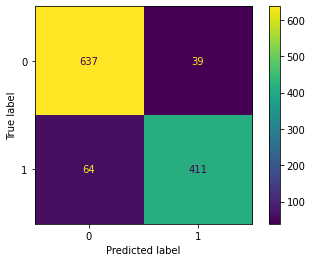

In [54]:
cm1 = confusion_matrix(Y_test, y_pred_xgboost)
ConfusionMatrixDisplay(confusion_matrix=cm1).plot();

In [55]:
print(classification_report(Y_test,y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       676
           1       0.91      0.87      0.89       475

    accuracy                           0.91      1151
   macro avg       0.91      0.90      0.91      1151
weighted avg       0.91      0.91      0.91      1151

